# Car ride-share potential in mid-size U.S. cities from geographic spread

## (notebook 4: clustering)

Fourth notebook for the IBM Data Science Specialization on Coursera, which contains the results from the 19 cities run in the second and third notebooks, and applies clustering to it to find cities of similar type.


In [1]:
# required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    !conda install -c anaconda seaborn -y
    import seaborn as sns

print(sns)
    
import random 
from sklearn.cluster import KMeans 
    
    
%matplotlib inline

<module 'seaborn' from '/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/__init__.py'>


## Consolidated city results

Copying the results from the 19 cities into one list:

In [2]:
l = []

#                                                      num     ind  mean      std      25th    median   75th     max      iqr       kurt     mad     skew
l.append([ 0, "Arlington, TX",       (4.84, -1.87),    19691,  537, 14.3387,  7.0843,  9.0238, 14.2145, 18.4895, 34.8673,  9.4657, -0.2858,  5.6521,  0.3754])
l.append([ 1, "New Orleans, LA",     (-19.74, -20.39), 29412,  712, 15.4791,  8.5741,  8.9713, 13.2711, 21.8997, 39.3860, 12.9284, -0.6378,  7.2039,  0.5151])
l.append([ 2, "Wichita, KS",         (2.67, 0.32),     16443,  330, 13.6548,  6.6745,  9.3498, 13.3901, 17.7241, 34.9169,  8.3743, -0.2915,  5.2644,  0.2283])
l.append([ 3, "Cleveland, OH",       (-3.04, -4.25),   29795,  923, 17.0707,  8.4256, 10.4362, 16.5191, 22.8600, 38.7520, 12.4237, -0.4959,  6.9080,  0.3652])
l.append([ 4, "Tampa, FL",           (-3.29, 6.03),    27350,  867, 15.1707,  6.5010, 10.5091, 14.7460, 19.3944, 39.0680,  8.8853, -0.0687,  5.1626,  0.3327])
l.append([ 5, "Bakersfield, CA",     (-9.23, 9.29),    13099,  265, 11.3379,  5.7561,  6.7734, 11.3896, 14.9125, 30.2031,  8.1391, -0.3846,  4.6722,  0.3264])
l.append([ 6, "Aurora, CO",          (-46.34, 8.81),   38823, 1319, 15.5712,  8.8961,  8.4923, 14.0925, 22.3417, 46.4409, 13.8494, -0.4944,  7.4455,  0.4949])
l.append([ 7, "Anaheim, CA",         (-8.97, -28.35),  50441, 1366, 18.7794,  7.6983, 12.9883, 17.8040, 23.4351, 43.2360, 10.4467, -0.1643,  6.2545,  0.5582])
l.append([ 8, "Honolulu, HI",        (-8.50, 0.38),    22199,  518, 21.1932, 11.2569, 12.6960, 20.3462, 29.5430, 49.0593, 16.8469, -0.7434,  9.2879,  0.2719])
l.append([ 9, "Santa Ana, CA",       (-7.97, 4.08),    54031, 1271, 20.0972,  9.3565, 12.7733, 18.3937, 27.6653, 47.2550, 14.8920, -0.6433,  7.9070,  0.4425])
l.append([10, "Riverside, CA",       (-3.48, 12.50),   23727,  571, 23.2236,  9.8502, 16.7946, 24.3600, 30.6846, 46.6344, 13.8899, -0.6989,  8.1771, -0.2850])
l.append([11, "Corpus Christi, TX",  (4.72, -3.82),    10409,  157, 13.2069,  8.4404,  6.4260, 11.3794, 18.7835, 42.7136, 12.3575, -0.1420,  6.9449,  0.7373])
l.append([12, "Lexington, KY",       (-4.13, -4.12),   13018,  258, 10.7035,  5.9801,  6.7620,  9.9097, 13.2641, 38.6219,  6.5021,  3.4513,  4.3775,  1.4738])
l.append([13, "Stockton, CA",        (-2.88, 9.47),    10320,  261, 14.7223,  9.6108,  6.4719, 12.8890, 22.8703, 40.4613, 16.3983, -0.8536,  8.2666,  0.4875])
l.append([14, "St. Louis, MO",       (-13.04, -2.29),  33249,  779, 17.2145,  9.5642, 10.0638, 16.0151, 23.0403, 49.0773, 12.9764, -0.0928,  7.7394,  0.5622])
l.append([15, "Saint Paul, MN",      (-18.15, -1.65),  38889, 1388, 14.1652,  5.6409,  9.9856, 14.2069, 18.5735, 30.4644,  8.5878, -0.6202,  4.7007, -0.0357])
l.append([16, "Henderson, NV",       (-34.31, 21.92),  46569, 1246, 17.2175,  9.9413,  9.1680, 15.5206, 25.7430, 42.6078, 16.5749, -0.9627,  8.4417,  0.3339])
l.append([17, "Pittsburgh, PA",      (0.35, -1.04),    28870,  687, 14.6092,  8.7759,  7.4238, 13.3848, 20.9797, 41.0456, 13.5558, -0.4846,  7.3007,  0.5579])
l.append([18, "Cincinnati, OH",      (0.47, 0.28),     25115,  719, 21.3201, 14.1753,  9.7997, 17.7427, 31.5938, 67.4332, 21.7941,  0.1362, 11.8521,  0.8254])

cities_stats_df = pd.DataFrame(l)
cities_stats_df.columns = ["city index", "city name, state", "center coord", "total num venues", "total num indicators", "mean distance to center",
                           "std dev", "25th percentile", "median", "75th percentile", "max distance to center", "interquartile range", "kurtosis",
                           "mean absolute deviation", "skewedness"]



In [3]:
cities_stats_df

city index    city name, state      center coord  total num venues  \
0            0       Arlington, TX     (4.84, -1.87)             19691   
1            1     New Orleans, LA  (-19.74, -20.39)             29412   
2            2         Wichita, KS      (2.67, 0.32)             16443   
3            3       Cleveland, OH    (-3.04, -4.25)             29795   
4            4           Tampa, FL     (-3.29, 6.03)             27350   
5            5     Bakersfield, CA     (-9.23, 9.29)             13099   
6            6          Aurora, CO    (-46.34, 8.81)             38823   
7            7         Anaheim, CA   (-8.97, -28.35)             50441   
8            8        Honolulu, HI      (-8.5, 0.38)             22199   
9            9       Santa Ana, CA     (-7.97, 4.08)             54031   
10          10       Riverside, CA     (-3.48, 12.5)             23727   
11          11  Corpus Christi, TX     (4.72, -3.82)             10409   
12          12       Lexington, KY    (-4.13, -4.12)             13018   
13          13        Stockton, CA     (-2.88, 9.47)             10320   
14          14       St. Louis, MO   (-13.04, -2.29)             33249   
15          15      Saint Paul, MN   (-18.15, -1.65)             38889   
16          16       Henderson, NV   (-34.31, 21.92)             46569   
17          17      Pittsburgh, PA     (0.35, -1.04)             28870   
18          18      Cincinnati, OH      (0.47, 0.28)             25115   

    total num indicators  mean distance to center  std dev  25th percentile  \
0                    537                  14.3387   7.0843           9.0238   
1                    712                  15.4791   8.5741           8.9713   
2                    330                  13.6548   6.6745           9.3498   
3                    923                  17.0707   8.4256          10.4362   
4                    867                  15.1707   6.5010          10.5091   
5                    265                  11.3379   5.7561           6.7734   
6                   1319                  15.5712   8.8961           8.4923   
7                   1366                  18.7794   7.6983          12.9883   
8                    518                  21.1932  11.2569          12.6960   
9                   1271                  20.0972   9.3565          12.7733   
10                   571                  23.2236   9.8502          16.7946   
11                   157                  13.2069   8.4404           6.4260   
12                   258                  10.7035   5.9801           6.7620   
13                   261                  14.7223   9.6108           6.4719   
14                   779                  17.2145   9.5642          10.0638   
15                  1388                  14.1652   5.6409           9.9856   
16                  1246                  17.2175   9.9413           9.1680   
17                   687                  14.6092   8.7759           7.4238   
18                   719                  21.3201  14.1753           9.7997   

     median  75th percentile  max distance to center  interquartile range  \
0   14.2145          18.4895                 34.8673               9.4657   
1   13.2711          21.8997                 39.3860              12.9284   
2   13.3901          17.7241                 34.9169               8.3743   
3   16.5191          22.8600                 38.7520              12.4237   
4   14.7460          19.3944                 39.0680               8.8853   
5   11.3896          14.9125                 30.2031               8.1391   
6   14.0925          22.3417                 46.4409              13.8494   
7   17.8040          23.4351                 43.2360              10.4467   
8   20.3462          29.5430                 49.0593              16.8469   
9   18.3937          27.6653                 47.2550              14.8920   
10  24.3600          30.6846                 46.6344              13.8899   
11  11.3794       

## Visualize the raw data

### Histograms

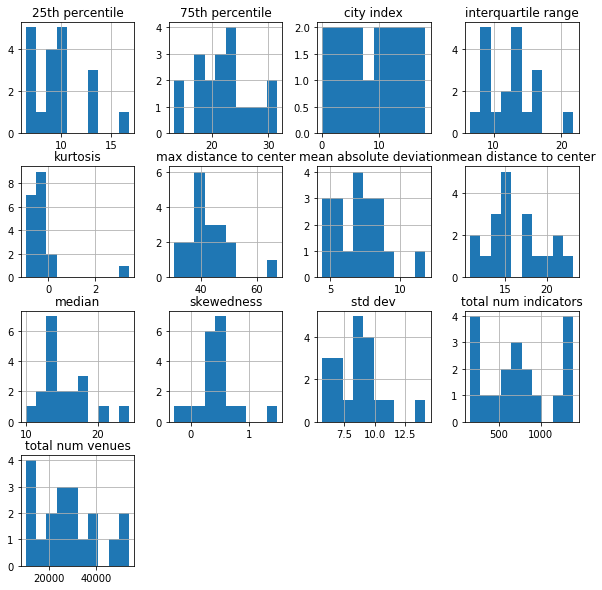

In [4]:
cities_stats_df.hist(figsize=(10,10))
plt.show()

Looks like the data is distributed nicely across the cities. The farthest outlier is in `kurtosis`. It corresponds to Lexington, KY.

### Correlations

Looking at a correlations heatmap (originally from https://seaborn.pydata.org/examples/many_pairwise_correlations.html )

In [5]:
corr = cities_stats_df.corr()
corr

city index  total num venues  total num indicators  \
city index                 1.000000          0.129098              0.111116   
total num venues           0.129098          1.000000              0.946315   
total num indicators       0.111116          0.946315              1.000000   
mean distance to center    0.183899          0.444661              0.360957   
std dev                    0.441189          0.132968              0.058503   
25th percentile           -0.100302          0.471683              0.404256   
median                     0.070875          0.397853              0.332025   
75th percentile            0.303811          0.392597              0.315308   
max distance to center     0.447240          0.191205              0.120622   
interquartile range        0.472887          0.191738              0.136254   
kurtosis                   0.099958         -0.309378             -0.313610   
mean absolute deviation    0.446714          0.160086              0.090034   
skewedness                 0.203635         -0.203300             -0.259078   

                         mean distance to center   std dev  25th percentile  \
city index                              0.183899  0.441189        -0.100302   
total num venues                        0.444661  0.132968         0.471683   
total num indicators                    0.360957  0.058503         0.404256   
mean distance to center                 1.000000  0.748681         0.839137   
std dev                                 0.748681  1.000000         0.278953   
25th percentile                         0.839137  0.278953         1.000000   
median                                  0.953896  0.552848         0.938122   
75th percentile                         0.961867  0.875936         0.673223   
max distance to center                  0.712016  0.911527         0.313029   
interquartile range                     0.690488  0.967198         0.195475   
kurtosis                               -0.405259 -0.283214        -0.289097   
mean absolute deviation                 0.746839  0.995943         0.270987   
skewedness                             -0.386647  0.036269        -0.564010   

                           median  75th percentile  max distance to center  \
city index               0.070875         0.303811                0.447240   
total num venues         0.397853         0.392597                0.191205   
total num indicators     0.332025         0.315308                0.120622   
mean distance to center  0.953896         0.961867                0.712016   
std dev                  0.552848         0.875936                0.911527   
25th percentile          0.938122         0.673223                0.313029   
median                   1.000000         0.858386                0.514492   
75th percentile          0.858386         1.000000                0.782699   
max distance to center   0.514492         0.782699                1.000000   
interquartile range      0.484208         0.856773                0.819777   
kurtosis                -0.402631        -0.465186               -0.012547   
mean absolute deviation  0.549037         0.884654                0.885659   
skewedness              -0.550972        -0.321250                0.230988   

                         interquartile range  kurtosis  \
city index                          0.472887  0.099958   
total num venues                    0.191738 -0.309378   
total num indicators                0.136254 -0.313610   
mean distance to center             0.690488 -0.405259   
std dev                             0.967198 -0.283214   
25th percentile                     0.195475 -0.289097   
median                              0.484208 -0.402631   
75th percentile                     0.856773 -0.465186   
max distance to center              0.819777 -0.012547   
interquartile range                 1.000000 -0.415348   
kurtosis                           -0.415348  1.000000   
mean absolute deviatio

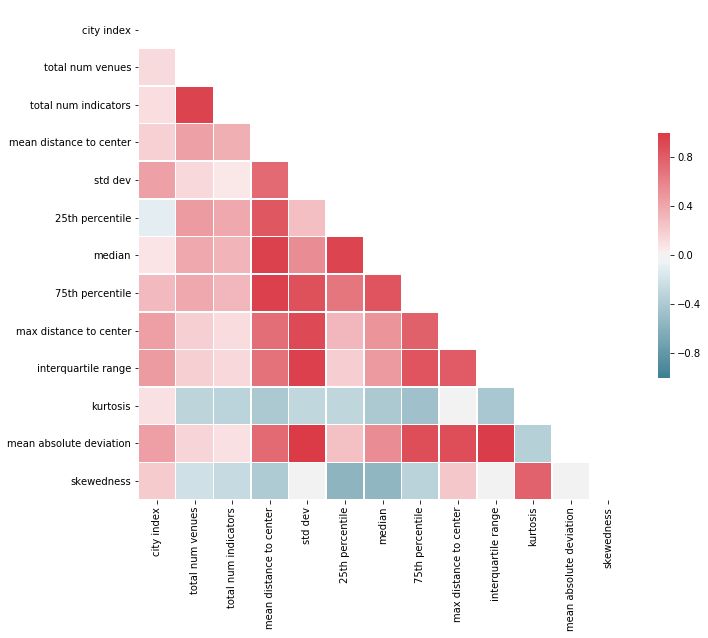

In [6]:
def draw_correlations_heatmap(corr):
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True


    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
draw_correlations_heatmap(corr)

## Feature engineering

In order to make the cities comparable, engineer some features from these data points:
* The "city index" column matches the DataFrame index and can be dropped, together with the city name, state, and center coordinates.
* The number of indicator venues is normalized by the total number of venues, to give a percentage indication. This will be set aside, to sort the cities once clustering by geographic distribution is done (`cities_ind_df`). The city with the highest percentage of indicator venues will be flagged "most indicative city" and given special attention.
* Some of the data points are highly correlated. In order to keep the number of features small but indicative of a city's distribution, identify the highest correlated data points and see to reduce them into a single feature.
* The dataframe for clustering (`cities_geo_df`) will be standardized by dividing the distribution columns by their standard deviation, and centralizing it (subtracting the average). This weighs each column equally when performing k-means clustering.
* Reduce the distance of outliers by applying a curve (arctan) that leaves values near 0 mostly unchanged but bounds overall values into the `[-pi/2, pi/2]` interval.

### Indicator venues as percentage of total venues

In [7]:
# percent of indicator venues as compared to total number of venues

cities_ind_df = pd.DataFrame([cities_stats_df['city name, state'], cities_stats_df['total num indicators'] / cities_stats_df['total num venues']]).transpose()
cities_ind_df.columns = ['city name, state', 'indicator venues percent']

cities_ind_df.sort_values(by='indicator venues percent')


city name, state indicator venues percent
11  Corpus Christi, TX                0.0150831
12       Lexington, KY                0.0198187
2          Wichita, KS                0.0200693
5      Bakersfield, CA                0.0202306
8         Honolulu, HI                0.0233344
14       St. Louis, MO                0.0234293
9        Santa Ana, CA                0.0235235
17      Pittsburgh, PA                0.0237963
10       Riverside, CA                0.0240654
1      New Orleans, LA                0.0242078
13        Stockton, CA                0.0252907
16       Henderson, NV                 0.026756
7          Anaheim, CA                0.0270811
0        Arlington, TX                0.0272713
18      Cincinnati, OH                0.0286283
3        Cleveland, OH                0.0309784
4            Tampa, FL                0.0317002
6           Aurora, CO                0.0339747
15      Saint Paul, MN                0.0356913

The highest number of indicator venues is Saint Paul, MN, with about 3.6% of total venues. Aurora, CO is also high, however, is problematic since the algorithm drifted straight into Denver, CO, and omitted a good part of Aurora itself. Denver, however, is outside the scope of this study. Therefore, Saint Paul, MN, is the selected "most indicative city".

### Select data points for geo distribution


In [12]:
# geographic distribution: pick geo columns
cities_geo_df = cities_stats_df.drop(['city index', 'city name, state', 'center coord', 'total num venues', 'total num indicators'], axis=1, inplace=False)
cities_geo_df

mean distance to center  std dev  25th percentile   median  \
0                   14.3387   7.0843           9.0238  14.2145   
1                   15.4791   8.5741           8.9713  13.2711   
2                   13.6548   6.6745           9.3498  13.3901   
3                   17.0707   8.4256          10.4362  16.5191   
4                   15.1707   6.5010          10.5091  14.7460   
5                   11.3379   5.7561           6.7734  11.3896   
6                   15.5712   8.8961           8.4923  14.0925   
7                   18.7794   7.6983          12.9883  17.8040   
8                   21.1932  11.2569          12.6960  20.3462   
9                   20.0972   9.3565          12.7733  18.3937   
10                  23.2236   9.8502          16.7946  24.3600   
11                  13.2069   8.4404           6.4260  11.3794   
12                  10.7035   5.9801           6.7620   9.9097   
13                  14.7223   9.6108           6.4719  12.8890   
14                  17.2145   9.5642          10.0638  16.0151   
15                  14.1652   5.6409           9.9856  14.2069   
16                  17.2175   9.9413           9.1680  15.5206   
17                  14.6092   8.7759           7.4238  13.3848   
18                  21.3201  14.1753           9.7997  17.7427   

    75th percentile  max distance to center  interquartile range  kurtosis  \
0           18.4895                 34.8673               9.4657   -0.2858   
1           21.8997                 39.3860              12.9284   -0.6378   
2           17.7241                 34.9169               8.3743   -0.2915   
3           22.8600                 38.7520              12.4237   -0.4959   
4           19.3944                 39.0680               8.8853   -0.0687   
5           14.9125                 30.2031               8.1391   -0.3846   
6           22.3417                 46.4409              13.8494   -0.4944   
7           23.4351                 43.2360              10.4467   -0.1643   
8           29.5430                 49.0593              16.8469   -0.7434   
9           27.6653                 47.2550              14.8920   -0.6433   
10          30.6846                 46.6344              13.8899   -0.6989   
11          18.7835                 42.7136              12.3575   -0.1420   
12          13.2641                 38.6219               6.5021    3.4513   
13          22.8703                 40.4613              16.3983   -0.8536   
14          23.0403                 49.0773              12.9764   -0.0928   
15          18.5735                 30.4644               8.5878   -0.6202   
16          25.7430                 42.6078              16.5749   -0.9627   
17          20.9797                 41.0456              13.5558   -0.4846   
18          31.5938                 67.4332              21.7941    0.1362   

    mean absolute deviation  skewedness  
0                    5.6521      0.3754  
1                    7.2039      0.5151  
2                    5.2644      0.2283  
3                    6.9080      0.3652  
4                    5.1626      0.3327  
5                    4.6722      0.3264  
6                    7.4455      0.4949  
7                    6.2545      0.5582  
8                    9.2879      0.2719  
9                    7.9070      0.4425  
10                   8.1771     -0.2850  
11                   6.9449      0.7373  
12                   4.3775      1.4738  
13                   8.2666      0.4875  
14                   7.7394      0.5622  
15                   4.7007     -0.0357  
16                   8.4417      0.3339  
17                   7.3007      0.5579  
18                  11.8521      0.8254

### Remove highly correlated data points

Build a correlation matrix and take it to the fourth power. This forces smaller values closely to 0 and allows to quickly identify higher values (which correspond to higher anti-/correlations).

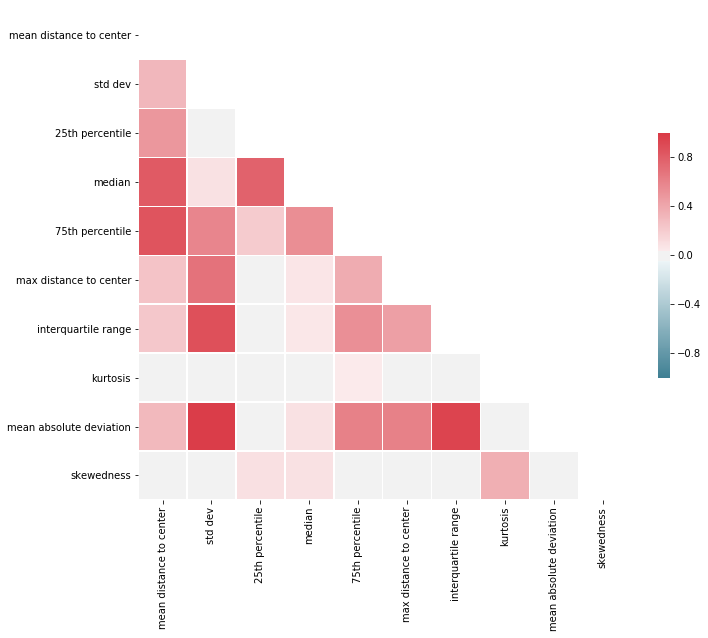

In [13]:
corr = cities_geo_df.corr()
corr = corr * corr * corr * corr

draw_correlations_heatmap(corr)

Mean absolute deviation correlates highly with standard deviation, as well as interquartile range. Also, mean distance to center correlates highly with median and 75th percentile. Median correlates highly with 75th percentile and then also quite a bit with 25th percentile. Finally, standard deviation correlates highly with interquartile range, maximum distance to center, and 75th percentile.

Therfore, remove mean absolute deviation, mean distance to center, median, and standard deviation.

In [14]:
cities_geo_df = cities_geo_df.drop(['mean absolute deviation', 'mean distance to center', 'median', 'std dev'], axis=1)

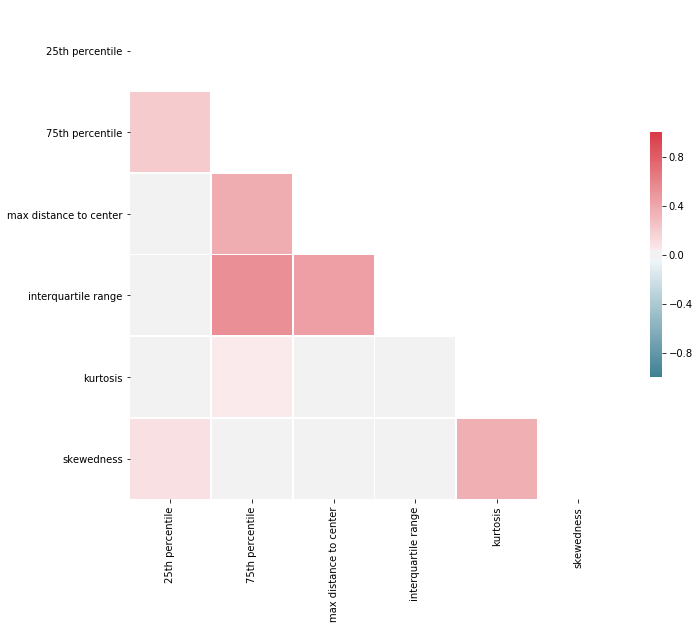

In [15]:
corr = cities_geo_df.corr()
corr = corr * corr * corr * corr

draw_correlations_heatmap(corr)

Regular heatmap (without any powers)

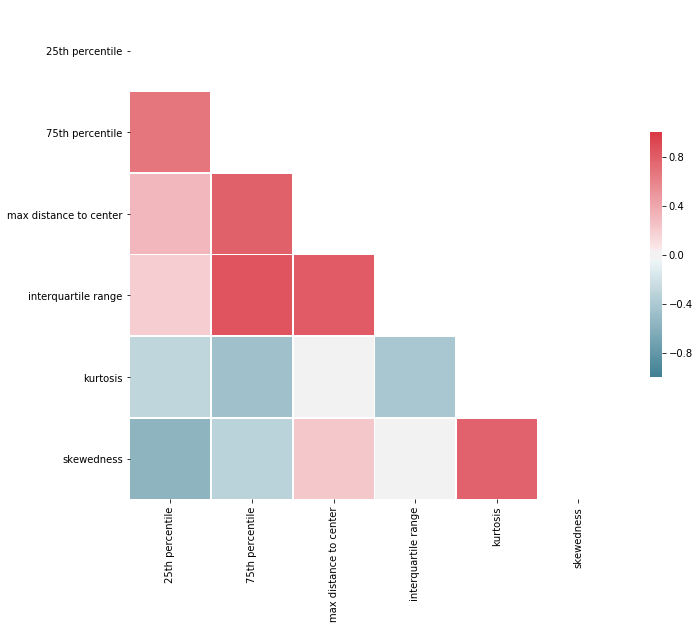

In [16]:
corr = cities_geo_df.corr()
draw_correlations_heatmap(corr)

### Standardize the features

In [17]:
# geographic distribution: pick geo columns
cities_geo_df = cities_stats_df.drop(['city index', 'city name, state', 'center coord', 'total num venues', 'total num indicators'], axis=1, inplace=False)
cities_geo_df = cities_geo_df.drop(['mean absolute deviation', 'mean distance to center', 'median', 'std dev'], axis=1)

# divide by standard deviation
cities_geo_df = cities_geo_df / cities_geo_df.std()
# subtract mean
cities_geo_df = cities_geo_df - cities_geo_df.mean()

cities_geo_df

25th percentile  75th percentile  max distance to center  \
0         -0.266282        -0.754354               -0.889517   
1         -0.286020        -0.080160               -0.343103   
2         -0.143715        -0.905673               -0.883519   
3          0.264742         0.109691               -0.419768   
4          0.292151        -0.575456               -0.381556   
5         -1.112371        -1.461524               -1.453525   
6         -0.466111         0.007223                0.509996   
7          1.224262         0.223388                0.122450   
8          1.114365         1.430915                0.826620   
9          1.143428         1.059695                0.608439   
10         2.655327         1.656609                0.533394   
11        -1.242984        -0.696230                0.059280   
12        -1.116657        -1.787412               -0.435500   
13        -1.225727         0.111727               -0.213074   
14         0.124730         0.145336                0.828797   
15         0.095329        -0.737747               -1.421928   
16        -0.212066         0.679658                0.046487   
17        -0.867838        -0.262043               -0.142419   
18         0.025436         1.836357                3.048444   

    interquartile range  kurtosis  skewedness  
0             -0.814772 -0.053417   -0.214740  
1              0.093170 -0.428211    0.182378  
2             -1.100944 -0.059486   -0.632893  
3             -0.039165 -0.277122   -0.243735  
4             -0.966957  0.177741   -0.336121  
5             -1.162615 -0.158615   -0.354029  
6              0.334662 -0.275525    0.124957  
7             -0.557548  0.075951    0.304897  
8              1.120626 -0.540649   -0.508954  
9              0.608039 -0.434067   -0.023998  
10             0.345282 -0.493268   -2.092025  
11            -0.056523  0.099695    0.814015  
12            -1.591847  3.925682    2.907626  
13             1.003000 -0.657985    0.103921  
14             0.105756  0.152081    0.316267  
15            -1.044963 -0.409471   -1.383353  
16             1.049306 -0.774150   -0.332710  
17             0.257679 -0.265091    0.304044  
18             2.417814  0.395910    1.064452

### Value bound (arctan)

Some of the features have outliers that would make an undue large contribution to an Euclidean distance function. In order to reduce the contribution to the distance function to be used for k-means clustering, apply a bounding function that leaves values near 0 unchanged, but limits larger (and smaller) values into the `[-pi/2, pi/2]` interval. The inverse tangent (`arctan`) does that.

Before applying the bounding function:

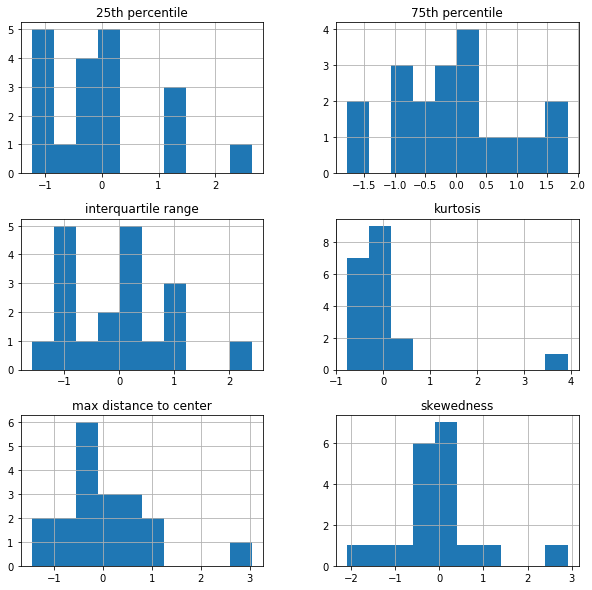

In [18]:
cities_geo_df.hist(figsize=(10,10))
plt.show()

Apply the bounding function and plot the distribution again:

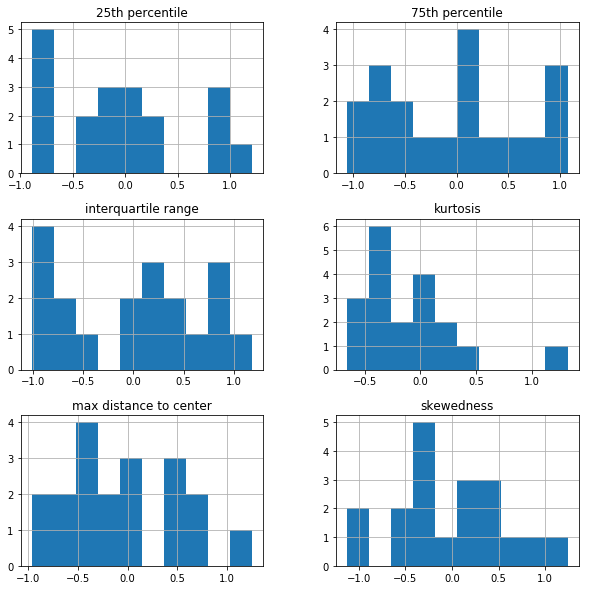

In [19]:
cities_geo_df = np.arctan(cities_geo_df)
cities_geo_df.hist(figsize=(10,10))
plt.show()

Looks good, ready for clustering.

## Clustering (k-means)

The `cities_geo_df` DataFrame now holds standardized and bounded geographic distribution values, and `cities_ind_df` holds the relative number of indicator venues (as well as the city name and state, for convenience).

Test run with two clusters, `k=2`:

In [20]:
def run_k_means(X, random_seed=0, num_k=2, num_init=20):
    np.random.seed(random_seed)
    k_means = KMeans(init = "k-means++", n_clusters = num_k, n_init=num_init)
    k_means.fit(X)
    k_means_labels = k_means.labels_
    
    return k_means_labels

In [21]:
k_means_labels = pd.Series(run_k_means(cities_geo_df))
print(k_means_labels)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
dtype: int32


Looks nicely distributed. Run k-means with different cluster sizes, and see how the cities are distributed. Also, look which cluster is assigned to St Paul, MN (index 15), the "most indicative city":

In [22]:
st_paul_idx = 15

In [23]:
for num_k in range(2, 11):
    k_means_labels = pd.Series(run_k_means(cities_geo_df, num_k=num_k))
    k_means_vc = k_means_labels.value_counts()
    k_st_paul = k_means_labels.iloc[st_paul_idx]
    
    print('k-means for k={}\nSt Paul, MN in cluster {}\nvalue counts:\n{}\n'.format(num_k, k_st_paul, k_means_vc))

k-means for k=2
St Paul, MN in cluster 0
value counts:
0    10
1     9
dtype: int64

k-means for k=3
St Paul, MN in cluster 1
value counts:
0    9
1    6
2    4
dtype: int64

k-means for k=4
St Paul, MN in cluster 1
value counts:
2    7
0    6
1    5
3    1
dtype: int64

k-means for k=5
St Paul, MN in cluster 1
value counts:
0    7
1    5
4    3
2    3
3    1
dtype: int64

k-means for k=6
St Paul, MN in cluster 0
value counts:
2    5
0    5
1    4
5    3
4    1
3    1
dtype: int64

k-means for k=7
St Paul, MN in cluster 0
value counts:
2    5
0    5
1    3
6    2
5    2
4    1
3    1
dtype: int64

k-means for k=8
St Paul, MN in cluster 4
value counts:
4    5
1    4
2    3
6    2
0    2
7    1
5    1
3    1
dtype: int64

k-means for k=9
St Paul, MN in cluster 1
value counts:
1    5
6    4
4    2
2    2
0    2
8    1
7    1
5    1
3    1
dtype: int64

k-means for k=10
St Paul, MN in cluster 1
value counts:
1    5
4    3
9    2
2    2
0    2
8    1
7    1
6    1
5    1
3    1
dtype: int64

Starting at `k >= 5` there is at least one outlier city (one sole city for a cluster label), whereas the city distribution for `2 <= k < 5` is about evenly between cluster labels. For `k>=4` there are 5 cities in the same cluster as St Paul, MN. This is great as it indicates that the cluster that contains our "most indicative city" is stable, independent of number of clusters. This makes `k=4` pr `k=5` a good selection of cluster labels, as the smallest number of clusters from which on the algorithm appears stable for our purpose.

### Cities in the same cluster as St Paul, MN for k=4 and k=5

Since k-means clustering may vary on starting condition, find which cities most often end up in the same cluster as St Paul.

In [24]:
print('k=4: cities in the same cluster as St Paul, MN, for different random seeds:')
for random_seed in range(0, 20):
    k_means_labels = pd.Series(run_k_means(cities_geo_df, num_k=4, random_seed=random_seed, num_init=1))
    k_st_paul = k_means_labels.iloc[st_paul_idx]
    cities_in_clust = cities_ind_df.index[k_means_labels == k_st_paul].tolist()
    print(cities_in_clust)

print('\nk=5: cities in the same cluster as St Paul, MN, for different random seeds:')
for random_seed in range(0, 20):
    k_means_labels = pd.Series(run_k_means(cities_geo_df, num_k=5, random_seed=random_seed, num_init=1))
    k_st_paul = k_means_labels.iloc[st_paul_idx]
    cities_in_clust = cities_ind_df.index[k_means_labels == k_st_paul].tolist()
    print(cities_in_clust)


k=4: cities in the same cluster as St Paul, MN, for different random seeds:
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 15]
[0, 2, 3, 4, 5, 7, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 15, 17]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 12, 15]

k=5: cities in the same cluster as St Paul, MN, for different random seeds:
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 3, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 12, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]
[0, 2, 4, 5, 15]


Both `k=4` and `k=5` are mostly stable, and the result `[0, 2, 4, 5, 12, 15]` appearing most frequently. The city `[12]` could go either way. Let's see what cities these are:

In [25]:
cities_in_clust = [0, 2, 4, 5, 12, 15]
cities_ind_df.ix[cities_in_clust].sort_values(by='indicator venues percent')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


city name, state indicator venues percent
12    Lexington, KY                0.0198187
2       Wichita, KS                0.0200693
5   Bakersfield, CA                0.0202306
0     Arlington, TX                0.0272713
4         Tampa, FL                0.0317002
15   Saint Paul, MN                0.0356913

Visual comparison for these cities based on the earlier runs:













## Final recommendation

The cities do appear to have their venues spread out geographically. Sorted by percent of indicator venues, the bottom three are all around 2%, with the top three between 2.7% and 3.6%:

In [26]:
cities_ind_df.ix[cities_in_clust].sort_values(by='indicator venues percent', ascending=False)

city name, state indicator venues percent
15   Saint Paul, MN                0.0356913
4         Tampa, FL                0.0317002
0     Arlington, TX                0.0272713
5   Bakersfield, CA                0.0202306
2       Wichita, KS                0.0200693
12    Lexington, KY                0.0198187

This gives the final recommendation from this study:
* Saint Paul, MN,
* Tampa, FL,
* Arlington, TX.

Note that Tampa, FL was also the city with the third-highest relative count of indicator venues. As far as the methodology for this study is concerned, the result appears stable. We can leave it to the ficticious customer to decide whether they agree with the methodology.